# Chi-squared on a histogram

Let $x_i$ be the x coordinates of the data points we observe, and let $f(x_i)$ be the model we are trying to fit. We assume that the data that we observe is generated from this model with some extra error, usually do to some sort of noise.

$$y_i = f(x_i) + \epsilon $$

where $\epsilon$ is a random variable drawn from a Gaussian distribution with mean $0$. Usually, in most physics experiments, we will be able to quantify the width of the distribution by making repeated measurements and calculating the standard error, which will give us a vector of standard errors, $\sigma_i$, which are usually plotted as errorbars like in the plot above.

### Exercise 3:
a) So, we assume that $y_i$ is a random variable with mean $f(x_i)$, and variance $\sigma_i^2$. Given this, what is the probability distribution for $y_i$?

b) Given the answer to a), and assuming that the probability distributions for each of the $y_i$ are independent, then we have



The probability distribution is given by 

$$P(y_i) = \frac{1}{\sigma_i\sqrt{2\pi}} \exp\left( -\frac{1}{2} \frac{(y_i - f(x_i))^2}{\sigma_i^2}\right)$$

If we assume each of the $y_i$ are indpendent random variables, we have the joint probabilty distribution given by

$$P(y_1, y_2, ... ) = \frac{1}{(2\pi)^{k/2}\prod_i\sigma_i} \exp\left( -\frac{1}{2} \sum_i\frac{(y_i - f(x_i))^2}{\sigma_i^2}\right)$$

Now, this is the probability distribution of observing the data given a particular model $f(x)$. This is known as the <b>likelihood</b> function. Note that the probability of observing the data given a particular model is *not* always the same as the probability of a particular model being true given observed data (although they are related). To begin, however, we will assume that if we find the model that maximizes the probability of the observed data, this model is close to the true model. This technique is called <b>Maximum Likelihood Estimation</b> (MLE).

Usually, our model $f$ is a function not only of the indpendent variable $x$ but of various parameters representing the model, lets cal them $\alpha_1, \alpha_2, \alpha_3 ... \alpha_m $. So, we would like to find the parameters that maximize the likelihood distribution, i.e.

$$\alpha^{\text{best}}_j = \text{argmax}_{\alpha_j} \left( \frac{1}{(2\pi)^{k/2}\prod_i\sigma_i} \exp\left( -\frac{1}{2} \sum_i\frac{(y_i - f(x_i; \alpha_1, \alpha_2, ...))^2}{\sigma_i^2}\right)\right)$$

We know that since the logarithm is a monotonically increasing function, if we maximize the logarithm of this function, we maximize the function itself. This means that

$$\alpha^{\text{best}}_j = \text{argmax}_{\alpha_j} \left( -\frac{1}{2} \sum_i\frac{(y_i - f(x_i; \alpha_1, \alpha_2, ...))^2}{\sigma_i^2} - \sum_i \log (\sigma_i\sqrt{2\pi}) \right)$$

The term involving the $\sum_i \log (\sigma_i\sqrt{2\pi})$ is a constant for the data, so we can ignore it in the maximization. 

$$\alpha^{\text{best}}_j = \text{argmax}_{\alpha_j} \left( -\frac{1}{2} \sum_i\frac{(y_i - f(x_i; \alpha_1, \alpha_2, ...))^2}{\sigma_i^2}  \right)$$

We know that the $-\frac{1}{2}$ in front just multiplies by a constant. So, if we want to maximize a function $-\frac{1}{2}g(z)$ with respect to $z$, we can just minimize $g(z)$ with respect to $z$, which means that

$$\alpha^{\text{best}}_j = \text{argmin}_{\alpha_j} \left(\sum_i\frac{(y_i - f(x_i; \alpha_1, \alpha_2, ...))^2}{\sigma_i^2}  \right)$$

Therefore, the maximum likelihood solution for the parameters can be found by minimizing the sum of squared residuals divided by the variance. This sum has a name, and it known as the $\chi^2$. It is defined again, as

$$\chi^2(\alpha_1, \alpha_2 ... \alpha_m) = \sum_i\frac{(y_i - f(x_i; \alpha_1, \alpha_2, ...))^2}{\sigma_i^2}$$

So, many fitting problems that you will encounter come down to minimizing this sum. In lecture, we had a similar sum, but without the $\sigma_i^2$ in the denominator. If we assume that each point has the same uncertainty, than minimizing this $\chi^2$ is the same as minimizing the sum we saw in lecture. This technique that I'm showing you is known as <b>weighted least squares</b>, as opposed to the derivation we saw in lecture that was <b>ordinary least squares</b>.

In lecture, we saw how this can be solved analytically, using linear algebra or vector calculus. However, we can use the computer to numerically minimize the chi-square. The most famous of these techniques is known as gradient descent, which Phil will go over in one of the lectures, and is what the Python package lmfit uses. However, now we will delve deeper into the significance of chi-square and how we can use it to assess goodness of fit.

Let's see what chi-squared tells us about data on a histogram.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare

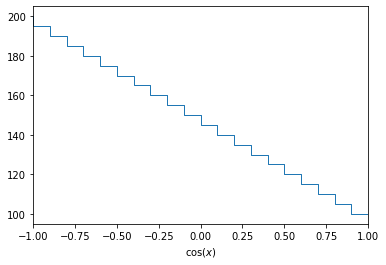

In [2]:
# model
pred = np.genfromtxt('chisq_model.txt', delimiter=',')    # read in file
x = np.array([n[0] for n in pred])    # get x values
pred_y = [n[1] for n in pred]    # get y values
plt.xlim(-1,1)
plt.xlabel(r'$\cos (x)$')
plt.plot(x,pred_y,linewidth=1,drawstyle='steps')

In [3]:
yerr = np.random.normal(scale=2,size=len(x))+8
def plot_error(y):
    plt.errorbar(x,y,yerr=yerr,ecolor='k',elinewidth=1,capsize=4,linestyle='')

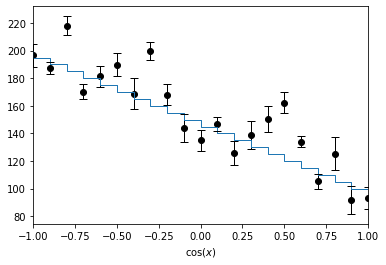

In [4]:
data1 = np.loadtxt('chisq_data1.txt', delimiter=',')    # read in file
plt.xlim(-1,1)
plt.xlabel(r'$\cos (x)$')
plt.plot(x,pred_y,linewidth=1,drawstyle='steps')
plt.scatter(x,data1,c='k')
plot_error(data1)

In [5]:
chi2,p = chisquare(data1,pred_y)
print("Chi-squared:",chi2)
print("Probability: {:.4%}".format(p)) #a bit dodgy!

Chi-squared: 39.69160552081839
Probability: 0.5463%


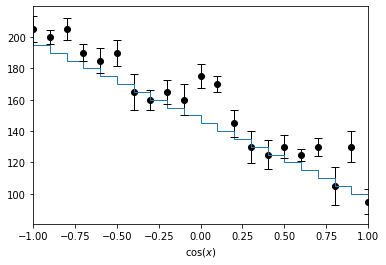

In [6]:
data2 = np.loadtxt('chisq_data2.txt', delimiter=',')    # read in file
plt.xlim(-1,1)
plt.xlabel(r'$\cos (x)$')
plt.plot(x,pred_y,linewidth=1,drawstyle='steps')
plt.scatter(x,data2,c='k')
plot_error(data2)

In [7]:
chi2,p = chisquare(data2,pred_y)
print("Chi-squared:",chi2)
print("Probability: {:.2%}".format(p)) #quite consistent!

Chi-squared: 21.440852814319058
Probability: 37.16%


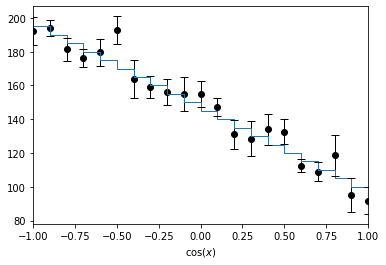

In [8]:
data3 = np.loadtxt('chisq_data3.txt', delimiter=',')    # read in file
plt.xlim(-1,1)
plt.xlabel(r'$\cos (x)$')
plt.plot(x,pred_y,linewidth=1,drawstyle='steps')
plt.scatter(x,data3,c='k')
plot_error(data3)

In [140]:
chi2,p = chisquare(data3,pred_y)
print("Chi-squared:",chi2)
print("Probability: {:.2%}".format(p)) #too consistent...

Chi-squared: 8.205210261052239
Probability: 99.04%
